<a href="https://colab.research.google.com/github/WielandF/Alphafold-localvis-jupyter/blob/main/af2_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import py3Dmol
import ipywidgets as ipy
from ipywidgets import Output
from IPython import display
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
with open("ranked_0.pdb") as ifile:
    system = "".join([x for x in ifile])

with open('result_model_3_multimer.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
PLDDT_BANDS = [(0, 50, '#FF7D45'),
               (50, 70, '#FFDB13'),
               (70, 90, '#65CBF3'),
               (90, 100, '#0053D6')]

In [ ]:
#Experimental Code to get coloring working
banded_b_factors = []
final_atom_mask=data['structure_module']
for plddt in data['plddt']:
  for idx, (min_val, max_val, _) in enumerate(PLDDT_BANDS):
    if plddt >= min_val and plddt <= max_val:
      banded_b_factors.append(idx)
      break
banded_b_factors = np.array(banded_b_factors)[:, None] * final_atom_mask
to_visualize_pdb = utils.overwrite_b_factors(relaxed_pdb, banded_b_factors)

In [ ]:
view = py3Dmol.view(width=400, height=300)
view.addModelsAsFrames(system)
view.setStyle({'model': -1}, {"cartoon": {'color': 'spectrum'}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
show_sidechains = True
def plot_plddt_legend():
  """Plots the legend for pLDDT."""
  thresh = ['Very low (pLDDT < 50)',
            'Low (70 > pLDDT > 50)',
            'Confident (90 > pLDDT > 70)',
            'Very high (pLDDT > 90)']

  colors = [x[2] for x in PLDDT_BANDS]

  plt.figure(figsize=(2, 2))
  for c in colors:
    plt.bar(0, 0, color=c)
  plt.legend(thresh, frameon=False, loc='center', fontsize=20)
  plt.xticks([])
  plt.yticks([])
  ax = plt.gca()
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  plt.title('Model Confidence', fontsize=20, pad=20)
  return plt

In [ ]:
#to_visualize_pdb = system

In [ ]:
# Show the structure coloured by chain if the multimer model has been used.

if True:
  multichain_view = py3Dmol.view(width=800, height=600)
  multichain_view.addModelsAsFrames(to_visualize_pdb)
  multichain_style = {'cartoon': {'colorscheme': 'chain'}}
  multichain_view.setStyle({'model': -1}, multichain_style)
  multichain_view.zoomTo()
  multichain_view.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
# Color the structure by per-residue pLDDT
color_map = {i: bands[2] for i, bands in enumerate(PLDDT_BANDS)}
view = py3Dmol.view(width=800, height=600)
view.addModelsAsFrames(to_visualize_pdb)
style = {'cartoon': {'colorscheme': {'prop': 'b', 'map': color_map}}}
if show_sidechains:
  style['stick'] = {}
view.setStyle({'model': -1}, style)
view.zoomTo()

grid = ipy.GridspecLayout(1, 2)
out = Output()
with out:
  view.show()
grid[0, 0] = out

out = Output()
with out:
  plot_plddt_legend().show()
grid[0, 1] = out

display.display(grid)

NameError: name 'PLDDT_BANDS' is not defined

In [ ]:
data.keys()

dict_keys(['distogram', 'experimentally_resolved', 'masked_msa', 'predicted_aligned_error', 'predicted_lddt', 'structure_module', 'plddt', 'aligned_confidence_probs', 'max_predicted_aligned_error', 'ptm', 'iptm', 'ranking_confidence'])

In [ ]:
plddt = data["plddt"]

Text(0, 0.5, 'Aligned residue')

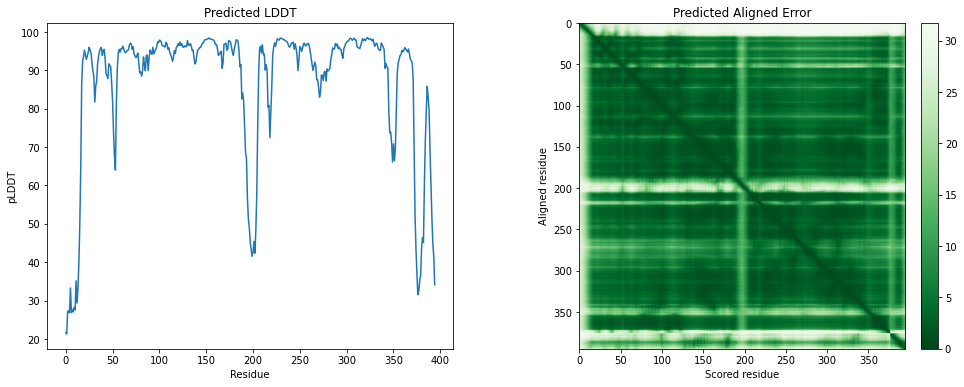

In [ ]:
plt.figure(figsize=[8, 6])
plt.subplot(1, 2, 1)
plt.plot(plddt)
plt.title('Predicted LDDT')
plt.xlabel('Residue')
plt.ylabel('pLDDT')


pae_output = (data['predicted_aligned_error'],
              data['max_predicted_aligned_error'])

plt.subplot(1, 2, 2)
pae, max_pae = pae_output
plt.imshow(pae, vmin=0., vmax=max_pae, cmap='Greens_r')
plt.colorbar(fraction=0.046, pad=0.04)

plt.title('Predicted Aligned Error')
plt.xlabel('Scored residue')
plt.ylabel('Aligned residue')